In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import cv2

## Eigen Face
from sklearn.decomposition import PCA 

import pickle

In [3]:
data = pickle.load(open('./data/data_images_100_100.pickle',mode='rb'))

In [4]:
data.head()

,pixel_pixel_0,pixel_pixel_1,pixel_pixel_2,pixel_pixel_3,pixel_pixel_4,pixel_pixel_5,pixel_pixel_6,pixel_pixel_7,pixel_pixel_8,pixel_pixel_9,...,pixel_pixel_9991,pixel_pixel_9992,pixel_pixel_9993,pixel_pixel_9994,pixel_pixel_9995,pixel_pixel_9996,pixel_pixel_9997,pixel_pixel_9998,pixel_pixel_9999,gender
0,0.784314,0.741176,0.737255,0.709804,0.721569,0.725490,0.701961,0.690196,0.741176,0.705882,...,0.415686,0.423529,0.435294,0.443137,0.450980,0.470588,0.458824,0.462745,0.478431,female
1,0.121569,0.098039,0.137255,0.098039,0.121569,0.113725,0.117647,0.121569,0.133333,0.133333,...,0.105882,0.086275,0.117647,0.086275,0.137255,0.078431,0.137255,0.254902,0.074510,female
2,0.082353,0.074510,0.094118,0.098039,0.094118,0.109804,0.129412,0.180392,0.239216,0.266667,...,0.764706,0.760784,0.760784,0.760784,0.764706,0.764706,0.764706,0.764706,0.764706,female
3,0.133333,0.105882,0.109804,0.125490,0.117647,0.105882,0.086275,0.082353,0.098039,0.113725,...,0.019608,0.043137,0.074510,0.062745,0.011765,0.011765,0.058824,0.117647,0.137255,female
4,0.050980,0.058824,0.047059,0.054902,0.066667,0.094118,0.101961,0.098039,0.137255,0.160784,...,0.674510,0.717647,0.760784,0.827451,0.831373,0.839216,0.858824,0.866667,0.725490,female


## Eigen Face

In [5]:
X = data.drop('gender',axis=1).values 

In [6]:
X

array([[0.78431373, 0.74117647, 0.7372549 , ..., 0.45882353, 0.4627451 ,
        0.47843137],
       [0.12156863, 0.09803922, 0.1372549 , ..., 0.1372549 , 0.25490196,
        0.0745098 ],
       [0.08235294, 0.0745098 , 0.09411765, ..., 0.76470588, 0.76470588,
        0.76470588],
       ...,
       [0.14509804, 0.16862745, 0.18431373, ..., 0.47843137, 0.48235294,
        0.48627451],
       [0.4745098 , 0.47843137, 0.49803922, ..., 0.61960784, 0.63921569,
        0.63921569],
       [0.1254902 , 0.12156863, 0.11764706, ..., 0.56862745, 0.57254902,
        0.6       ]], shape=(2381, 10000))

In [7]:
mean_face = X.mean(axis=0) # flatten mean face
mean_face.shape

(10000,)

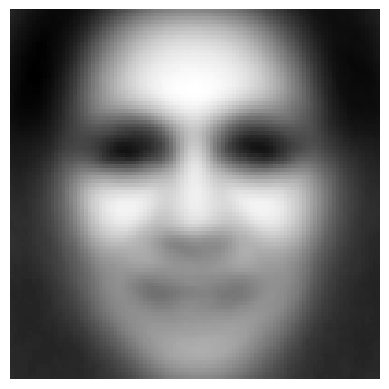

In [8]:
plt.imshow(mean_face.reshape((100,100)),cmap='gray')
plt.axis('off')
plt.show()

In [9]:
X_t = X - mean_face

In [10]:
pca = PCA(n_components=None,whiten=True,svd_solver='auto')
pca.fit(X_t)

PCA(whiten=True)

In [11]:
exp_var_df = pd.DataFrame()
exp_var_df['explained_var'] = pca.explained_variance_ratio_
exp_var_df['cum_explained_var'] = exp_var_df['explained_var'].cumsum()
exp_var_df['principal_components'] = np.arange(1,len(exp_var_df)+1)

exp_var_df.head()

,explained_var,cum_explained_var,principal_components
0,0.250494,0.250494,1
1,0.112027,0.362521,2
2,0.106517,0.469037,3
3,0.051817,0.520855,4
4,0.033192,0.554047,5


In [12]:
exp_var_df.set_index('principal_components',inplace=True)

# Visualização das variáveis explicadas?

<Axes: xlabel='principal_components'>

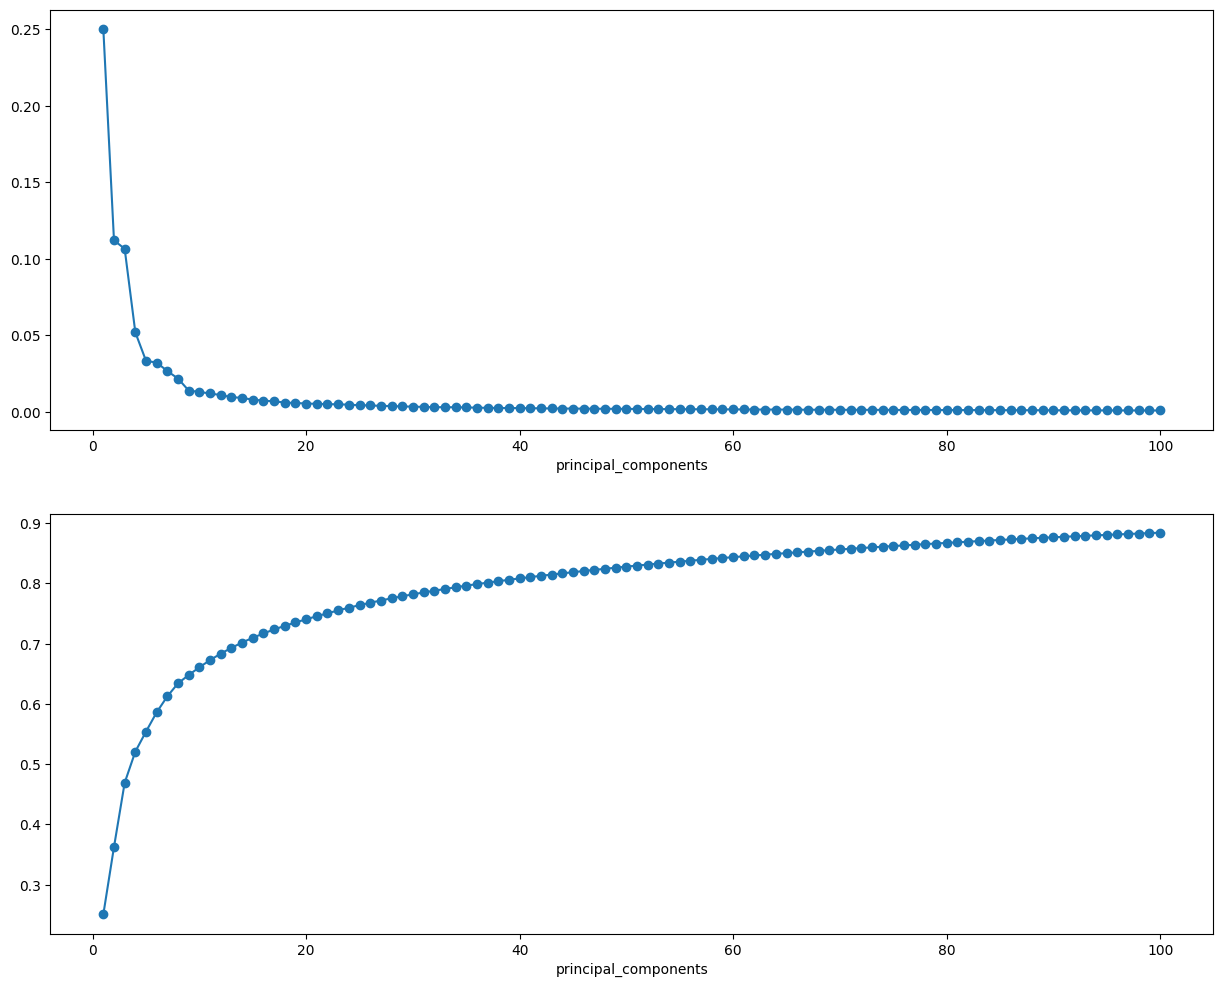

In [19]:
fig, ax = plt.subplots(nrows=2,figsize=(15,12))

exp_var_df['explained_var'].head(100).plot(kind='line',marker='o',ax=ax[0])
exp_var_df['cum_explained_var'].head(100).plot(kind='line',marker='o',ax=ax[1])

In [14]:
pca_50 = PCA(n_components=50,whiten=True,svd_solver='auto')
pca_data = pca_50.fit_transform(X_t)

In [15]:
pca_data.shape

(2381, 50)

# Salvando o modelo

In [16]:
y = data['gender'].values 
np.savez('./data/data_pca_50_target',pca_data,y)

In [17]:
pca_dict = {'pca':pca_50,'mean_face':mean_face}

In [18]:
pickle.dump(pca_dict,open('model/pca_dict.pickle','wb'))

# Eigen Image

In [20]:
pca_data_inv = pca_50.inverse_transform(pca_data)

In [21]:
pca_data_inv.shape

(2381, 10000)

In [22]:
eig_img = pca_data_inv[0,:].reshape((100,100))
eig_img.shape

(100, 100)

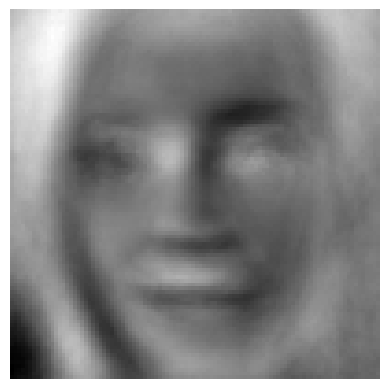

In [24]:
plt.imshow(eig_img,cmap='gray')
plt.axis('off')
plt.show()